In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("renewable_energy/renewable_energy.csv")
df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,RENEWABLE,TOT,KTOE,A,1960,4436.932,NaN
1,AUS,RENEWABLE,TOT,KTOE,A,1961,4490.510,NaN
2,AUS,RENEWABLE,TOT,KTOE,A,1962,4407.097,NaN
3,AUS,RENEWABLE,TOT,KTOE,A,1963,4628.738,NaN
4,AUS,RENEWABLE,TOT,KTOE,A,1964,4497.396,NaN
...,...,...,...,...,...,...,...,...
15899,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2011,8.150,NaN
15900,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2012,8.710,NaN
15901,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2013,9.160,NaN
15902,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2014,9.380,NaN


In [3]:
# Shape of dataset
df.shape  

# Column names
df.columns  

# Dataset info (types, nulls)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15904 entries, 0 to 15903
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    15904 non-null  object 
 1   INDICATOR   15904 non-null  object 
 2   SUBJECT     15904 non-null  object 
 3   MEASURE     15904 non-null  object 
 4   FREQUENCY   15904 non-null  object 
 5   TIME        15904 non-null  int64  
 6   Value       12017 non-null  float64
 7   Flag Codes  3887 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 994.1+ KB


In [4]:
# Numerical summary
df.describe()

# Categorical summary
df['LOCATION'].value_counts().head(10)


LOCATION
AUS    112
AUT    112
BEL    112
CAN    112
CZE    112
DNK    112
FIN    112
FRA    112
DEU    112
GRC    112
Name: count, dtype: int64

In [5]:
# Check missing values
df.isnull().sum()


LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value          3887
Flag Codes    12017
dtype: int64

In [6]:
# First 10 rows
df.head(10)

# Last 10 rows
df.tail(10)


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
15894,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2006,6.44,NaN
15895,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2007,6.64,NaN
15896,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2008,7.01,NaN
15897,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2009,7.45,NaN
15898,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2010,7.78,NaN
15899,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2011,8.15,NaN
15900,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2012,8.71,NaN
15901,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2013,9.16,NaN
15902,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2014,9.38,NaN
15903,OECD,RENEWABLE,TOT,PC_PRYENRGSUPPLY,A,2015,9.64,NaN


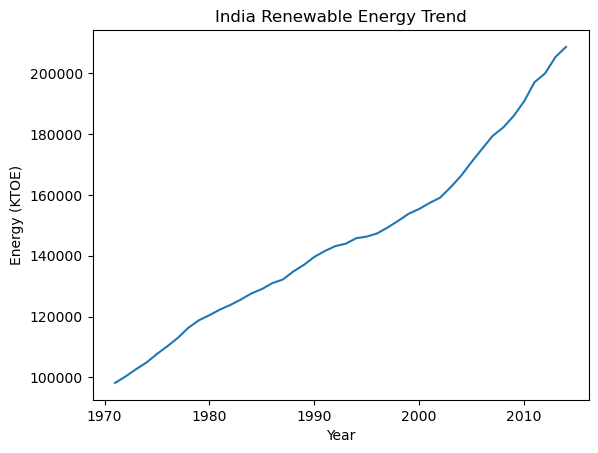

In [7]:
import matplotlib.pyplot as plt

# Example: Plot India's renewable energy over time
india = df[(df["LOCATION"] == "IND") & (df["MEASURE"] == "KTOE")]
plt.plot(india["TIME"], india["Value"])
plt.xlabel("Year")
plt.ylabel("Energy (KTOE)")
plt.title("India Renewable Energy Trend")
plt.show()


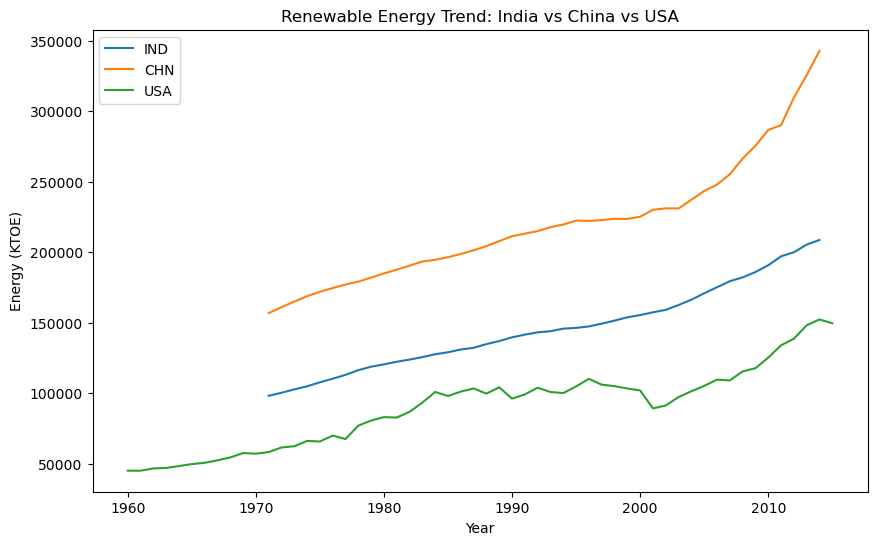

In [8]:
# Compare renewable energy trend of India, China, and USA
countries = ["IND", "CHN", "USA"]

plt.figure(figsize=(10,6))
for c in countries:
    country_data = df[(df["LOCATION"] == c) & (df["MEASURE"] == "KTOE")]
    plt.plot(country_data["TIME"], country_data["Value"], label=c)

plt.xlabel("Year")
plt.ylabel("Energy (KTOE)")
plt.title("Renewable Energy Trend: India vs China vs USA")
plt.legend()
plt.show()


In [11]:
# Top 5 countries by average renewable energy usage
top5 = df[df["MEASURE"] == "KTOE"].groupby("LOCATION")["Value"].mean().nlargest(5)
print("Top 5 countries with highest renewable energy usage (average):\n")
print(top5)


Top 5 countries with highest renewable energy usage (average):

LOCATION
WLD     1.188815e+06
G20     7.584354e+05
OECD    2.950305e+05
CHN     2.201270e+05
IND     1.457951e+05
Name: Value, dtype: float64


In [13]:
india_mean = india["Value"].mean()
above_avg_years = india[india["Value"] > india_mean]["TIME"].tolist()

print(f"India's average renewable energy usage: {india_mean:.2f} KTOE")
print("Years above average usage:", above_avg_years)


India's average renewable energy usage: 145795.14 KTOE
Years above average usage: [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
